In [135]:
### import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import svm

### Import & Read Data

In [136]:
mushroom_df = pd.read_csv("mushroom.csv")
mushroom_df.shape

(2000, 26)

### Exploratory Data Analysis

##### Data Understanding

In [137]:
mushroom_df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [138]:
## checking for missing values
mushroom_df.isna().sum()

#there are no null values in the dataset

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [139]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [140]:
mushroom_df.describe(include='all')

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.000000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000.000000,2000.000000
unique,NaN,5,4,9,2,9,4,3,2,12,...,2,4,3,8,9,6,7,2,NaN,NaN
top,NaN,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,...,universal,white,one,sheathing,brown,abundant,urban,poisonous,NaN,NaN
freq,NaN,439,568,263,1023,274,540,677,1007,216,...,1010,553,689,305,255,360,316,1400,NaN,NaN
mean,624.974000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.449118,12.314345
std,375.091938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.697217,7.048845
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000
25%,290.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.291009,5.723521
50%,607.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.318596,12.124902
75%,957.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.781272,18.698605


In [141]:
#drop unnamed column
mushroom_df.drop('Unnamed: 0',axis=1,inplace=True)

In [142]:
# check for unique values in the target column
mushroom_df['class'].unique()

array(['poisonous', 'edible'], dtype=object)

##### Data Visualization

In [143]:
poisonous_df = mushroom_df[mushroom_df['class']=='poisonous']
edible_df = mushroom_df[mushroom_df['class']=='edible']

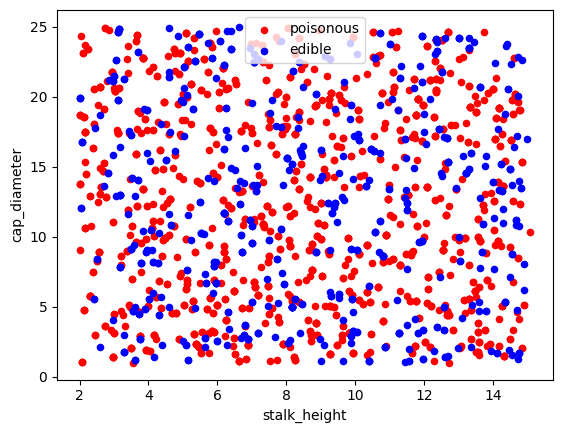

In [144]:
## plot the graph to check the distribution of the classes
ax_1 = poisonous_df.plot(kind='scatter',x ='stalk_height',y='cap_diameter',color = 'red',label = 'poisonous')
edible_df.plot(kind='scatter',x ='stalk_height',y='cap_diameter',color = 'blue',label = 'edible',ax=ax_1)
plt.show()

### Data Preprocessing

In [145]:
## Encode categorical variable
cat_col = mushroom_df.select_dtypes(include='object').columns

In [146]:
cat_col

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class'],
      dtype='object')

In [156]:
encoder = LabelEncoder()
encoder.fit([cat_col])

ValueError: y should be a 1d array, got an array of shape (1, 23) instead.

In [147]:
# ohe = OneHotEncoder(sparse_output=False)
# cat_transformed = ohe.fit_transform(mushroom_df[cat_col])

In [148]:
# ohe_df = pd.DataFrame(cat_transformed,columns=ohe.get_feature_names_out())
# ohe_df()

In [149]:
# new_mushroom_df = ohe_df.join(mushroom_df)
# new_mushroom_df.head()

In [150]:
# ## Scale numerical features
# num_col = mushroom_df.select_dtypes('number').columns
# num_col

In [151]:
# scaler = StandardScaler()
# scaler.fit(mushroom_df[num_col])

### Model Building

In [152]:
# ## Divide dataset into dependenent and independenent feature
# x = mushroom_df.drop('class',axis=1)
# y = mushroom_df['class']

In [153]:
# # ## split the dataset into training and testing
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)